## 데이터 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 도로 아이디 매핑된 격자 데이터 불러오기
df_mov = pd.read_csv('../data/유동인구_반경5단계.csv')
df_mov

,gid,pop_avg,lon,lat,geometry,pop_avg_500m,pop_avg_1000m,pop_avg_3000m,pop_avg_5000m,pop_avg_10000m
0,다바145999,0.170000,126.538832,37.094558,POINT (14086238.375637954 4452295.097883559),0.204730,0.205146,0.359734,1.206934,1.581830
1,다바154953,1.159996,126.549198,37.052951,POINT (14087392.265840653 4446490.112731701),2.684871,2.022758,2.283659,2.283659,1.591046
2,다바154954,1.654074,126.549279,37.053929,POINT (14087401.341536632 4446626.413582269),2.309893,1.707767,2.283659,2.283659,1.591046
3,다바154955,3.482000,126.549459,37.054531,POINT (14087421.371044517 4446710.436967964),2.481984,1.574879,2.283659,2.283659,1.591046
4,다바155954,2.120791,126.550311,37.053862,POINT (14087516.196808135 4446617.088636563),2.232793,1.644142,2.283659,2.283659,1.591046
...,...,...,...,...,...,...,...,...,...,...
58248,다사698102,3.711139,127.160397,37.190587,POINT (14155430.63666559 4465705.589086014),16.771287,12.189012,19.515294,45.289308,87.389498
58249,다사698103,82.010139,127.160486,37.191564,POINT (14155440.601865811 4465842.08389917),20.132961,13.951726,19.928905,45.065840,87.781414
58250,다사698104,9.990000,127.160108,37.192164,POINT (14155398.493769053 4465925.907988183),22.066519,15.469749,21.515211,45.512630,89.090800
58251,다사699102,60.077917,127.161241,37.190815,POINT (14155524.592048991 4465737.417155623),19.068016,13.198162,19.653612,43.851354,85.292425


In [8]:
# 공유차량 데이터 불러오기
df_use = pd.read_csv('.././data/1-11.화성시_공유차량_이용현황.csv')
df_house = pd.read_csv('.././data/1-12.공공주택임대_정보(화성시).csv')

# 블록단지별로 세대수와 주차면서 합계 및 위도 경도 추출
df_num = df_house.groupby('blck_cd').agg(
    noh=('noh', 'sum'),
    parking_slot=('parking_slot', 'sum'),
    lon=('lon', 'first'),
    lat=('lat', 'first')
).reset_index()

# 이용현황과 주택 데이터 결합한 데이터프레임 생성
df_log = df_use.merge(df_num, on='blck_cd')
df_log = df_log[['cmplx_nm', 'blck_cd', 'total_cnt', 'total_tm', 'car_type', 'car_cnt', 'noh', 'parking_slot','lon', 'lat']]
df_log.head() 

,cmplx_nm,blck_cd,total_cnt,total_tm,car_type,car_cnt,noh,parking_slot,lon,lat
0,화성남양뉴타운10,C02347,855,2888,모닝어반,1.0,1022,1533.0,126.834651,37.206978
1,화성남양뉴타운4,C01961,104,645,NaN,NaN,876,1314.0,126.829787,37.210028
2,화성남양뉴타운9,C02042,889,2151,NaN,NaN,782,1173.0,126.833895,37.209028
3,화성능동7-2,C01569,1377,3912,더뉴레이,1.0,963,1444.5,127.061128,37.211268
4,화성동탄2 28(행복주택),C02333,2090,6514,더뉴레이/올뉴모닝,2.0,816,1224.0,127.094684,37.163702


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 격자 정보 불러오기
gdf = gpd.read_file(".././data/1-14.화성시_격자.geojson")
gdf_mov = gdf.merge(df_mov[['gid', 'pop_avg', 'pop_avg_500m',
       'pop_avg_1000m', 'pop_avg_3000m', 'pop_avg_5000m', 'pop_avg_10000m']], on='gid')
gdf_mov

,gid,geometry,pop_avg,pop_avg_500m,pop_avg_1000m,pop_avg_3000m,pop_avg_5000m,pop_avg_10000m
0,다사385011,"POLYGON ((126.80784 37.10654, 126.80783 37.107...",20.534539,7.406875,8.187682,11.351205,11.853504,12.051839
1,다사312110,"POLYGON ((126.72478 37.19526, 126.72477 37.196...",2.818826,7.829276,12.027201,12.368186,11.188073,9.757456
2,다사473033,"POLYGON ((126.90672 37.12690, 126.90671 37.127...",9.829167,68.411083,73.154446,44.964006,28.363867,18.101126
3,다사602117,"POLYGON ((127.05149 37.20326, 127.05149 37.204...",124.511042,118.668240,149.519288,192.348501,130.020129,83.924374
4,다사476205,"POLYGON ((126.90889 37.28195, 126.90888 37.282...",0.503750,21.525971,25.819173,10.681834,16.850205,21.428510
...,...,...,...,...,...,...,...,...
58248,다사556115,"POLYGON ((126.99967 37.20125, 126.99966 37.202...",16.928125,31.222427,54.877298,46.245284,53.833244,54.204263
58249,다사513058,"POLYGON ((126.95159 37.14965, 126.95158 37.150...",0.057500,2.794986,3.540618,12.324709,17.800858,23.807133
58250,다사517088,"POLYGON ((126.95590 37.17672, 126.95589 37.177...",0.060000,1.899633,4.171989,14.917569,18.317617,28.389268
58251,다사456150,"POLYGON ((126.88673 37.23227, 126.88673 37.233...",1.178182,2.158445,2.512354,21.921839,17.696987,23.088198


In [5]:
# 화성시 2022년도 데이터 불러오기
df_2022 = pd.read_csv('../data/화성2022.csv')
df_2022 = df_2022[['gid', 'blck_cd']]
df_2022

,gid,blck_cd
0,다사385011,NaN
1,다사312110,NaN
2,다사473033,NaN
3,다사602117,NaN
4,다사476205,NaN
...,...,...
71379,다사513058,NaN
71380,다사553001,NaN
71381,다사517088,NaN
71382,다사456150,NaN


In [10]:
# 격자에 따라 데이터 결합하기
gdf_mov_2022 = gdf_mov.merge(df_2022, on='gid')
gdf_mov_2022 

,gid,geometry,pop_avg,pop_avg_500m,pop_avg_1000m,pop_avg_3000m,pop_avg_5000m,pop_avg_10000m,blck_cd
0,다사385011,"POLYGON ((126.80784 37.10654, 126.80783 37.107...",20.534539,7.406875,8.187682,11.351205,11.853504,12.051839,NaN
1,다사312110,"POLYGON ((126.72478 37.19526, 126.72477 37.196...",2.818826,7.829276,12.027201,12.368186,11.188073,9.757456,NaN
2,다사473033,"POLYGON ((126.90672 37.12690, 126.90671 37.127...",9.829167,68.411083,73.154446,44.964006,28.363867,18.101126,NaN
3,다사602117,"POLYGON ((127.05149 37.20326, 127.05149 37.204...",124.511042,118.668240,149.519288,192.348501,130.020129,83.924374,NaN
4,다사476205,"POLYGON ((126.90889 37.28195, 126.90888 37.282...",0.503750,21.525971,25.819173,10.681834,16.850205,21.428510,NaN
...,...,...,...,...,...,...,...,...,...
58248,다사556115,"POLYGON ((126.99967 37.20125, 126.99966 37.202...",16.928125,31.222427,54.877298,46.245284,53.833244,54.204263,NaN
58249,다사513058,"POLYGON ((126.95159 37.14965, 126.95158 37.150...",0.057500,2.794986,3.540618,12.324709,17.800858,23.807133,NaN
58250,다사517088,"POLYGON ((126.95590 37.17672, 126.95589 37.177...",0.060000,1.899633,4.171989,14.917569,18.317617,28.389268,NaN
58251,다사456150,"POLYGON ((126.88673 37.23227, 126.88673 37.233...",1.178182,2.158445,2.512354,21.921839,17.696987,23.088198,NaN


## 시각화
- 격자에 매핑된 유동인구 수치 따라 그림 생성
- 이때 공유차량 대여소 좌표와 이용횟수 등과 관계 관찰
- 의사결정 : 유의미한 유동인구의 반경은 얼마인가?
    - 500m, 1km, 3km, 5km, 10km 등 관찰하며 적당한 지점 포학하는 것이 목표
- 결론 : 1km _ 유동인구의 이동 경로가 눈에 보이며 실제 상권의 밀집 분포 그림과도 유사하게 나타남 
       - 또한 1km 반경에 따라 그려지는 좌표 상의 경로의 길목에 공유차량 대여 블록이 배치되어 있음

No handles with labels found to put in legend.


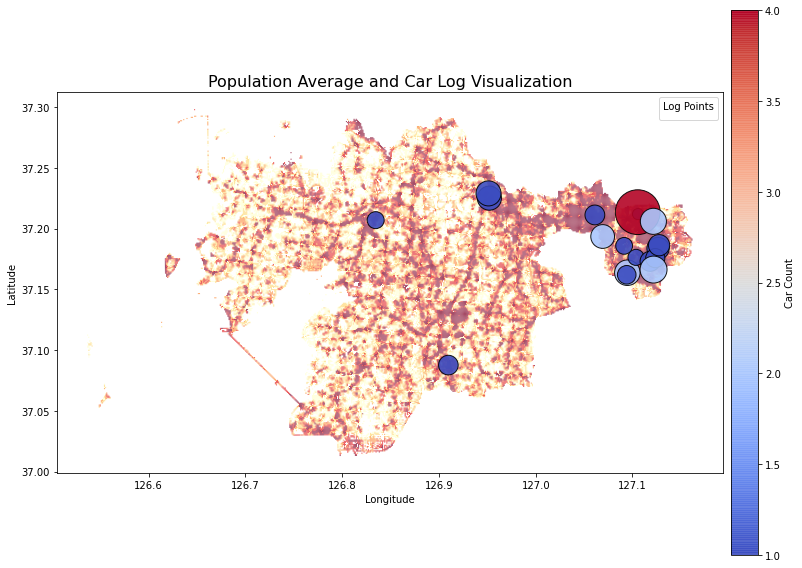

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# 기본 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 1. 격자 데이터 시각화 (gdf_mov_2022)
# pop_avg 컬럼을 색깔로 매핑 (Quantiles로 설정하여 색차이 강화)
gdf_mov_2022.plot(
    column='pop_avg',
    cmap='YlOrRd',  # 색상 맵 설정
    legend=True,
    scheme='Quantiles',  # Quantiles로 매핑 (구간마다 동일한 수의 값이 포함)
    k=5,  # 구간 개수
    alpha=0.7,  # 투명도 조절
    ax=ax,
    edgecolor='none'  # 격자 테두리 제거
)

# 2. 포인트 데이터 시각화 (df_log)
# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 포인트 그리기
sc = ax.scatter(
    df_log['lon'],  # 경도
    df_log['lat'],  # 위도
    s=df_log['total_tm'] * 0.1,  # 크기 조절 (배수를 통해 시각적 조정)
    c=df_log['car_cnt'],  # 색상 매핑
    cmap=cmap,
    norm=norm,
    alpha=0.9,
    edgecolor='k'
)

# 색상 막대 추가
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Car Count')

# 3. 시각화 설정
ax.set_title("Population Average and Car Log Visualization", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right", title="Log Points")

# 결과 출력
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


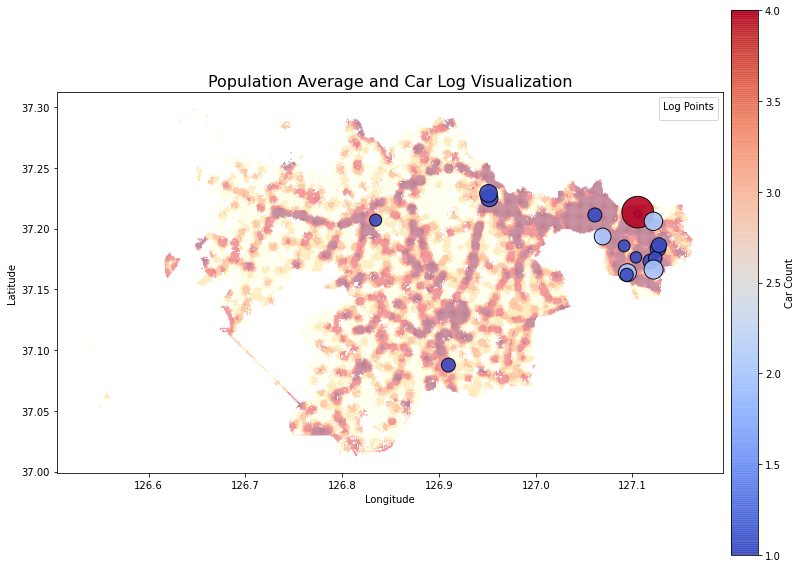

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# 기본 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 1. 격자 데이터 시각화 (gdf_mov_2022)
# pop_avg 컬럼을 색깔로 매핑 (Quantiles로 설정하여 색차이 강화)
gdf_mov_2022.plot(
    column='pop_avg_500m',
    cmap='YlOrRd',  # 색상 맵 설정
    legend=True,
    scheme='Quantiles',  # Quantiles로 매핑 (구간마다 동일한 수의 값이 포함)
    k=5,  # 구간 개수
    alpha=0.5,  # 투명도 조절
    ax=ax,
    edgecolor='none'  # 격자 테두리 제거
)

# 2. 포인트 데이터 시각화 (df_log)
# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 포인트 그리기
sc = ax.scatter(
    df_log['lon'],  # 경도
    df_log['lat'],  # 위도
    s=df_log['total_tm'] * 0.05,  # 크기 조절 (배수를 통해 시각적 조정)
    c=df_log['car_cnt'],  # 색상 매핑
    cmap=cmap,
    norm=norm,
    alpha=0.9,
    edgecolor='k'
)

# 색상 막대 추가
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Car Count')

# 3. 시각화 설정
ax.set_title("Population Average and Car Log Visualization", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right", title="Log Points")

# 결과 출력
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


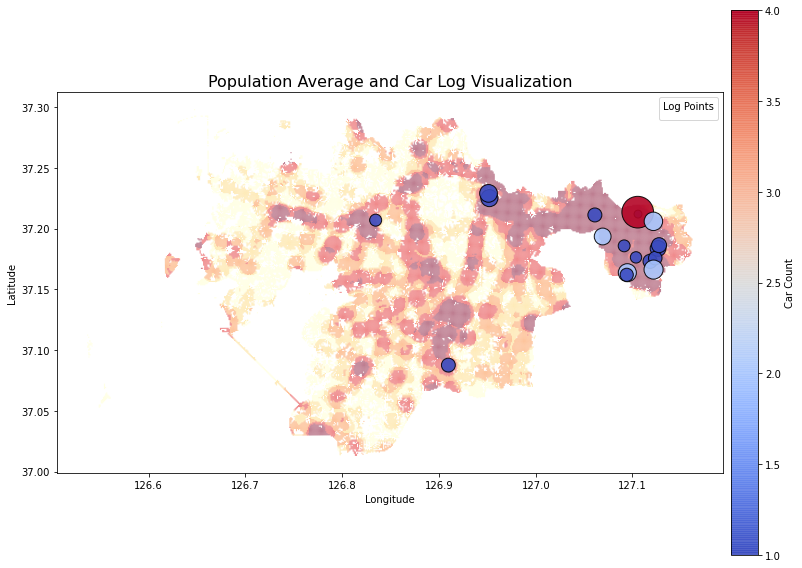

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# 기본 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 1. 격자 데이터 시각화 (gdf_mov_2022)
# pop_avg 컬럼을 색깔로 매핑 (Quantiles로 설정하여 색차이 강화)
gdf_mov_2022.plot(
    column='pop_avg_1000m',
    cmap='YlOrRd',  # 색상 맵 설정
    legend=True,
    scheme='Quantiles',  # Quantiles로 매핑 (구간마다 동일한 수의 값이 포함)
    k=5,  # 구간 개수
    alpha=0.5,  # 투명도 조절
    ax=ax,
    edgecolor='none'  # 격자 테두리 제거
)

# 2. 포인트 데이터 시각화 (df_log)
# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 포인트 그리기
sc = ax.scatter(
    df_log['lon'],  # 경도
    df_log['lat'],  # 위도
    s=df_log['total_tm'] * 0.05,  # 크기 조절 (배수를 통해 시각적 조정)
    c=df_log['car_cnt'],  # 색상 매핑
    cmap=cmap,
    norm=norm,
    alpha=0.9,
    edgecolor='k'
)

# 색상 막대 추가
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Car Count')

# 3. 시각화 설정
ax.set_title("Population Average and Car Log Visualization", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right", title="Log Points")

# 결과 출력
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


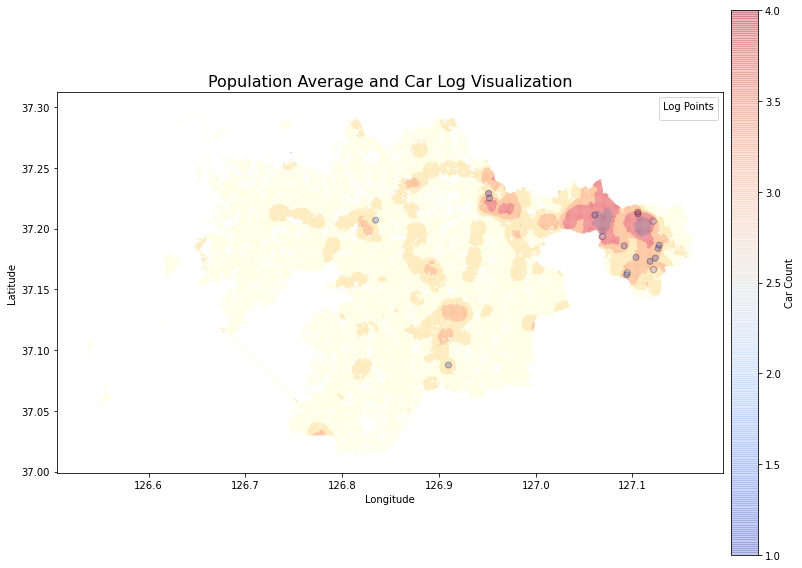

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# 기본 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 1. 격자 데이터 시각화 (gdf_mov_2022)
# pop_avg 컬럼을 색깔로 매핑 (Quantiles로 설정하여 색차이 강화)
gdf_mov_2022.plot(
    column='pop_avg_1000m',
    cmap='YlOrRd',  # 색상 맵 설정
    legend=True,
    scheme='NaturalBreaks',  # Quantiles로 매핑 (구간마다 동일한 수의 값이 포함)
    k=5,  # 구간 개수
    alpha=0.5,  # 투명도 조절
    ax=ax,
    edgecolor='none'  # 격자 테두리 제거
)

# 2. 포인트 데이터 시각화 (df_log)
# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 포인트 그리기
sc = ax.scatter(
    df_log['lon'],  # 경도
    df_log['lat'],  # 위도
    #s=df_log['total_tm'] * 0.05,  # 크기 조절 (배수를 통해 시각적 조정)
    c=df_log['car_cnt'],  # 색상 매핑
    cmap=cmap,
    norm=norm,
    alpha=0.3,
    edgecolor='k'
)

# 색상 막대 추가
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Car Count')

# 3. 시각화 설정
ax.set_title("Population Average and Car Log Visualization", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right", title="Log Points")

# 결과 출력
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


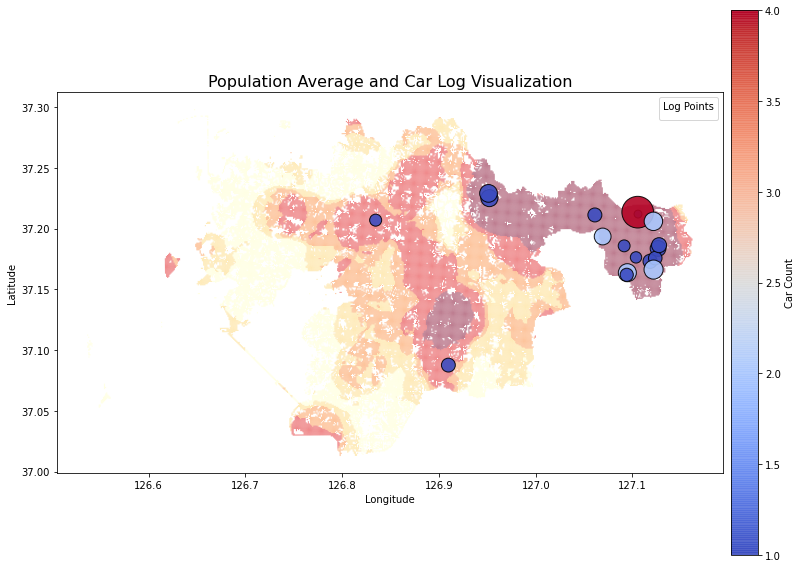

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# 기본 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 1. 격자 데이터 시각화 (gdf_mov_2022)
# pop_avg 컬럼을 색깔로 매핑 (Quantiles로 설정하여 색차이 강화)
gdf_mov_2022.plot(
    column='pop_avg_3000m',
    cmap='YlOrRd',  # 색상 맵 설정
    legend=True,
    scheme='Quantiles',  # Quantiles로 매핑 (구간마다 동일한 수의 값이 포함)
    k=5,  # 구간 개수
    alpha=0.5,  # 투명도 조절
    ax=ax,
    edgecolor='none'  # 격자 테두리 제거
)

# 2. 포인트 데이터 시각화 (df_log)
# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 포인트 그리기
sc = ax.scatter(
    df_log['lon'],  # 경도
    df_log['lat'],  # 위도
    s=df_log['total_tm'] * 0.05,  # 크기 조절 (배수를 통해 시각적 조정)
    c=df_log['car_cnt'],  # 색상 매핑
    cmap=cmap,
    norm=norm,
    alpha=0.9,
    edgecolor='k'
)

# 색상 막대 추가
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Car Count')

# 3. 시각화 설정
ax.set_title("Population Average and Car Log Visualization", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right", title="Log Points")

# 결과 출력
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


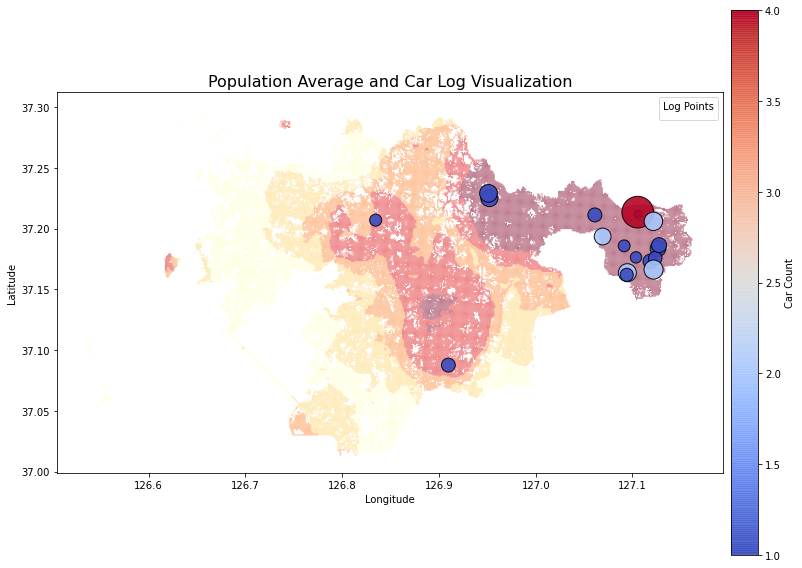

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# 기본 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 1. 격자 데이터 시각화 (gdf_mov_2022)
# pop_avg 컬럼을 색깔로 매핑 (Quantiles로 설정하여 색차이 강화)
gdf_mov_2022.plot(
    column='pop_avg_5000m',
    cmap='YlOrRd',  # 색상 맵 설정
    legend=True,
    scheme='Quantiles',  # Quantiles로 매핑 (구간마다 동일한 수의 값이 포함)
    k=5,  # 구간 개수
    alpha=0.5,  # 투명도 조절
    ax=ax,
    edgecolor='none'  # 격자 테두리 제거
)

# 2. 포인트 데이터 시각화 (df_log)
# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 포인트 그리기
sc = ax.scatter(
    df_log['lon'],  # 경도
    df_log['lat'],  # 위도
    s=df_log['total_tm'] * 0.05,  # 크기 조절 (배수를 통해 시각적 조정)
    c=df_log['car_cnt'],  # 색상 매핑
    cmap=cmap,
    norm=norm,
    alpha=0.9,
    edgecolor='k'
)

# 색상 막대 추가
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Car Count')

# 3. 시각화 설정
ax.set_title("Population Average and Car Log Visualization", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right", title="Log Points")

# 결과 출력
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


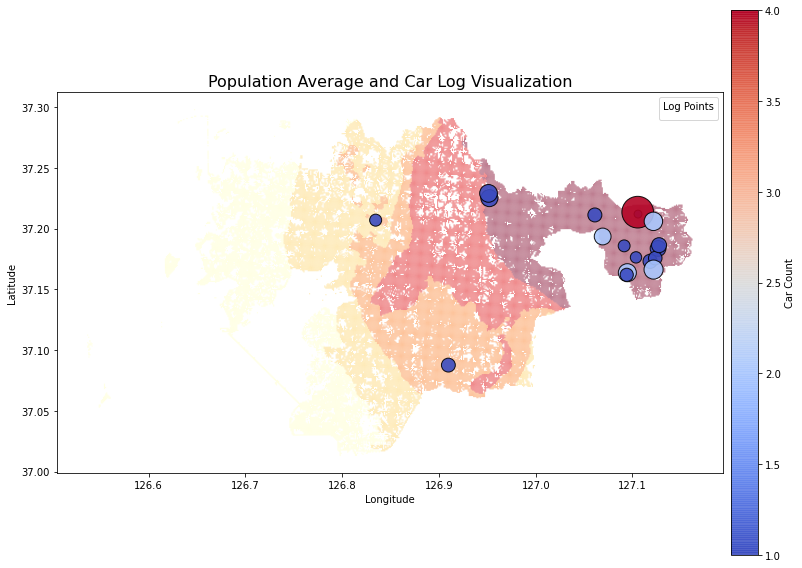

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# 기본 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 1. 격자 데이터 시각화 (gdf_mov_2022)
# pop_avg 컬럼을 색깔로 매핑 (Quantiles로 설정하여 색차이 강화)
gdf_mov_2022.plot(
    column='pop_avg_1000m',
    cmap='YlOrRd',  # 색상 맵 설정
    legend=True,
    scheme='Quantiles',  # Quantiles로 매핑 (구간마다 동일한 수의 값이 포함)
    k=5,  # 구간 개수
    alpha=0.5,  # 투명도 조절
    ax=ax,
    edgecolor='none'  # 격자 테두리 제거
)

# 2. 포인트 데이터 시각화 (df_log)
# 크기는 total_time, 색상은 car_cnt에 매핑
norm = Normalize(vmin=df_log['car_cnt'].min(), vmax=df_log['car_cnt'].max())
cmap = cm.get_cmap('coolwarm')

# 포인트 그리기
sc = ax.scatter(
    df_log['lon'],  # 경도
    df_log['lat'],  # 위도
    s=df_log['total_tm'] * 0.05,  # 크기 조절 (배수를 통해 시각적 조정)
    c=df_log['car_cnt'],  # 색상 매핑
    cmap=cmap,
    norm=norm,
    alpha=0.9,
    edgecolor='k'
)

# 색상 막대 추가
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Car Count')

# 3. 시각화 설정
ax.set_title("Population Average and Car Log Visualization", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc="upper right", title="Log Points")

# 결과 출력
plt.tight_layout()
plt.show()